#### Imports

In [654]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import math

#### Daten einlesen

In [655]:
df = pd.read_csv("output_combined.csv").iloc[4:, :]
df = df[df["stopwords_removed"] == True]
# df = df[df["language"] == "en"]

# Filter für Features, die mit in Klassifizierung mit einbezogen werden
features = ['node_count', 'edge_count', 'average_degree', 'median_degree', 'diameter', 'average_distance', 'betweenness_average', 'average_clustering']


X = df[features]
y = df['author']

#### Erstellen des Entscheidungsbaums und trainieren

In [656]:
# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 50


cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)


decision_tree = DecisionTreeClassifier()

accuracy_scores = cross_val_score(decision_tree, X, y, cv=cv) # statt cv kann hier auch direkt split_count genutzt werden

print(accuracy_scores)

[0.55555556 0.33333333 0.375      0.375      0.33333333 0.33333333
 0.5        0.375      0.44444444 0.55555556 0.5        0.5
 0.66666667 0.22222222 0.375      0.375      0.33333333 0.
 0.375      0.5        0.33333333 0.22222222 0.5        0.375
 0.33333333 0.11111111 0.375      0.125      0.44444444 0.33333333
 0.125      0.5        0.22222222 0.44444444 0.375      0.25
 0.11111111 0.33333333 0.125      0.5        0.44444444 0.22222222
 0.5        0.25       0.55555556 0.33333333 0.375      0.625
 0.44444444 0.33333333 0.25       0.375      0.33333333 0.33333333
 0.125      0.375      0.22222222 0.55555556 0.25       0.375
 0.66666667 0.33333333 0.25       0.         0.44444444 0.66666667
 0.25       0.375      0.55555556 0.66666667 0.25       0.25
 0.33333333 0.44444444 0.5        0.5        0.22222222 0.44444444
 0.375      0.25       0.77777778 0.33333333 0.25       0.375
 0.33333333 0.33333333 0.         0.5        0.55555556 0.33333333
 0.5        0.375      0.44444444 0.333333

#### Anzeige der Ergebnisse

In [657]:
accuracy_mean = np.mean(accuracy_scores)
print(f"Testdaten-Anteil: {1 / split_count}")
print(f"Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}")
print(f"Genauigkeit: ")
print(f"    Durchschnitt: {accuracy_mean}")
print(f"    Minimum: {min(accuracy_scores)}")
print(f"    Maximum: {max(accuracy_scores)}")
print(f"    Standardabweichung: {np.std(accuracy_scores)}")
print(f"    Prozentanteil über Zufall: {(np.where(accuracy_scores > 0.25)[0].shape[0]) / (split_count * n_repeats)}")
print(f"Insgesamt {len(df)} Einträge im Dataframe. ")

Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 200
Genauigkeit: 
    Durchschnitt: 0.3734722222222222
    Minimum: 0.0
    Maximum: 0.7777777777777778
    Standardabweichung: 0.14991503509292714
    Prozentanteil über Zufall: 0.725
Insgesamt 34 Einträge im Dataframe. 


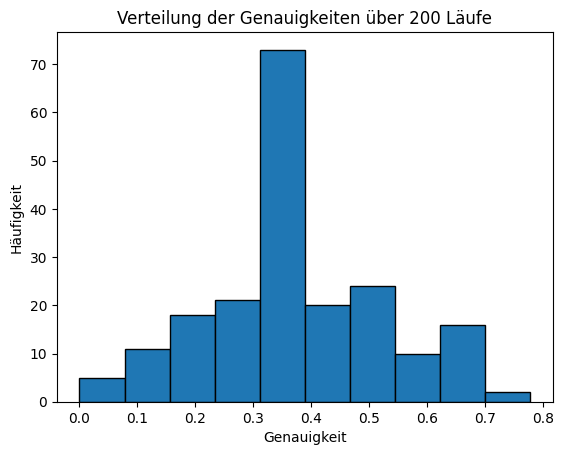

In [658]:
plt.hist(accuracy_scores, bins=10, edgecolor="black")
plt.xlabel("Genauigkeit")
plt.ylabel("Häufigkeit")
plt.title(f"Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe")
plt.show()

In [659]:
# plt.figure(figsize=(12, 8))
# tree.plot_tree(decision_tree, feature_names=features, filled=True)
# plt.show()